# * japan used cars datasets

# Problem Statement:

# Cars' data was scraped from tc-v.com and it included Information about Japan's largest online used car marketplace. Ten features were assembled for each car in the dataset.

# Predict the price of an unknown car. Build your own Algo for cars 24 !!!



# * always refer sklearn official doucmentation if you are not sure about syntax or parameters

# https://scikit-learn.org/stable/index.html¶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('japan_used_cars_datasets.csv')

In [3]:
data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [4]:
#Lets check the shape of dataset
data.shape

(2318, 11)

#  So , here we have 2318 rows and 11 columns

In [5]:
data.dtypes

id                  int64
price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


# understand data at high level .check the statistics of data set

In [7]:
data.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


# check the NUll value's

In [8]:
data.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

# There are no missing value's

In [9]:
data['mark'].value_counts()

toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia motors          4
isuzu               3
audi                3
smart               2
volvo               2
land rover          2
peugeot             2
hino                1
mitsuoka            1
ford                1
gm                  1
citroen             1
opel                1
chrysler            1
kubota              1
jaguar              1
Name: mark, dtype: int64

In [10]:
data['model'].value_counts()

fit                    270
vitz                   179
passo                  127
ist                     93
ractis                  85
                      ... 
sx4 sedan                1
207                      1
corolla ii               1
impreza sportswagon      1
estima t                 1
Name: model, Length: 258, dtype: int64

In [11]:
data['transmission'].value_counts()

at     2171
mt      117
cvt      30
Name: transmission, dtype: int64

In [12]:
data['drive'].value_counts()

2wd    2121
4wd     192
awd       5
Name: drive, dtype: int64

In [13]:
data['hand_drive'].value_counts()

rhd       2301
lhd         16
center       1
Name: hand_drive, dtype: int64

In [14]:
data['fuel'].value_counts()

gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: fuel, dtype: int64

# converting categorical feature to Numerical

In [15]:
data['fuel']=data['fuel'].replace({'gasoline':0,'diesel':1,'lpg':2,'hybrid':3,'cng':4})

In [16]:
data['fuel'].value_counts()

0    2290
1      18
2       7
3       2
4       1
Name: fuel, dtype: int64

In [17]:
data['hand_drive']=data['hand_drive'].replace({'rhd':0,'lhd':1,'center':2})

In [18]:
data['hand_drive'].value_counts()

0    2301
1      16
2       1
Name: hand_drive, dtype: int64

In [19]:
data['drive']=data['drive'].replace({'2wd':0,'4wd':1,'awd':2})

In [20]:
data['drive'].value_counts()

0    2121
1     192
2       5
Name: drive, dtype: int64

In [21]:
data['transmission']=data['transmission'].replace({'at':0,'mt':1,'cvt':2})

In [22]:
data['transmission'].value_counts()

0    2171
1     117
2      30
Name: transmission, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
lab_enc=LabelEncoder()

In [25]:
df2 = lab_enc.fit_transform(data['model'])
pd.Series(df2)

0       143
1       143
2       134
3        29
4       155
       ... 
2313    242
2314    100
2315    195
2316    256
2317    101
Length: 2318, dtype: int32

In [26]:
data['model']=df2

In [27]:
df3 = lab_enc.fit_transform(data['mark'])
pd.Series(df3)

0       19
1       19
2       19
3       25
4        4
        ..
2313    25
2314    25
2315    23
2316     8
2317    25
Length: 2318, dtype: int32

In [28]:
data['mark']=df3

In [29]:
data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,19,143,2003,80000,1240,0,0,0,0
1,1,110,19,143,2010,53000,1200,0,0,0,0
2,2,165,19,134,2005,47690,2000,0,0,0,0
3,3,190,25,29,2008,130661,1990,0,0,0,0
4,4,190,4,155,2006,66300,660,0,0,0,0


In [30]:
data.describe()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,19.411993,147.894305,2005.972390,100013.194996,1507.010785,0.076359,0.087144,0.007765,0.018119
std,674.460724,288.673112,7.132919,68.563361,3.698863,52512.478883,549.585170,0.310571,0.289655,0.092583,0.184930
min,0.000000,80.000000,0.000000,0.000000,1979.000000,2000.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,583.250000,776.000000,15.000000,104.000000,2004.000000,67000.000000,1300.000000,0.000000,0.000000,0.000000,0.000000
50%,1168.500000,1000.000000,24.000000,146.000000,2006.000000,94000.000000,1490.000000,0.000000,0.000000,0.000000,0.000000
75%,1753.750000,1213.000000,25.000000,204.000000,2009.000000,124000.000000,1800.000000,0.000000,0.000000,0.000000,0.000000
max,2335.000000,1400.000000,27.000000,257.000000,2015.000000,790000.000000,12340.000000,2.000000,2.000000,2.000000,4.000000


# EDA (Exploratory data analysis)
# Basic Analysis with Visualisation

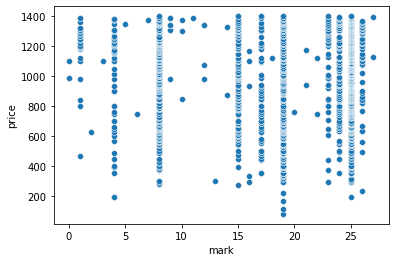

In [31]:
sns.scatterplot(x='mark',y='price',data=data)
plt.show()

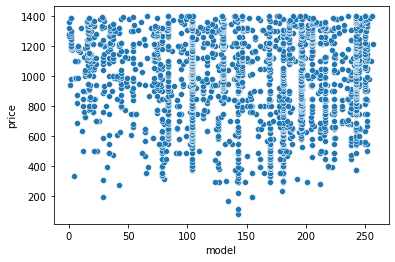

In [32]:
sns.scatterplot(x='model',y='price',data=data)
plt.show()

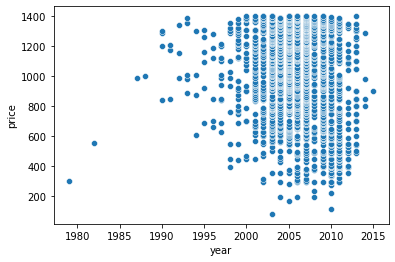

In [33]:
sns.scatterplot(x='year',y='price',data=data)
plt.show()

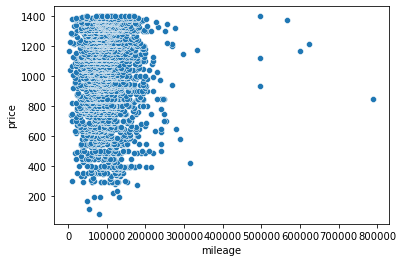

In [34]:
sns.scatterplot(x='mileage',y='price',data=data)
plt.show()

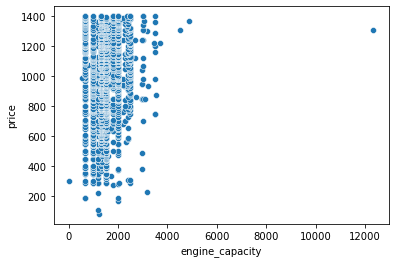

In [35]:
sns.scatterplot(x='engine_capacity',y='price',data=data)
plt.show()

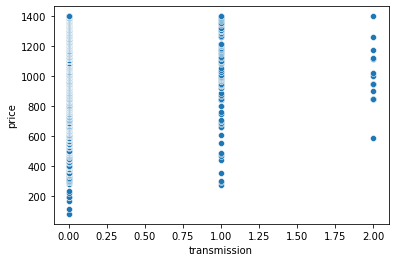

In [36]:
sns.scatterplot(x='transmission',y='price',data=data)
plt.show()

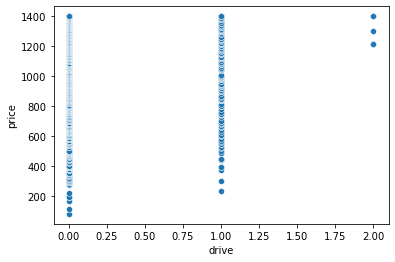

In [37]:
sns.scatterplot(x='drive',y='price',data=data)
plt.show()

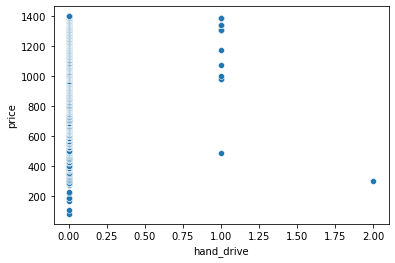

In [38]:
sns.scatterplot(x='hand_drive',y='price',data=data)
plt.show()

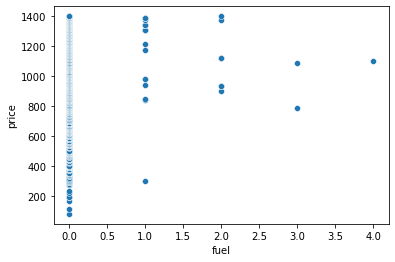

In [39]:
sns.scatterplot(x='fuel',y='price',data=data)
plt.show()

In [40]:
data.shape

(2318, 11)

In [41]:
data.corr()['price'].sort_values()

year              -0.211092
model             -0.041376
mileage            0.021581
transmission       0.022787
hand_drive         0.036473
fuel               0.044878
drive              0.046591
mark               0.090245
engine_capacity    0.173748
id                 0.985100
price              1.000000
Name: price, dtype: float64

# corrleation using heatmap:

<AxesSubplot:>

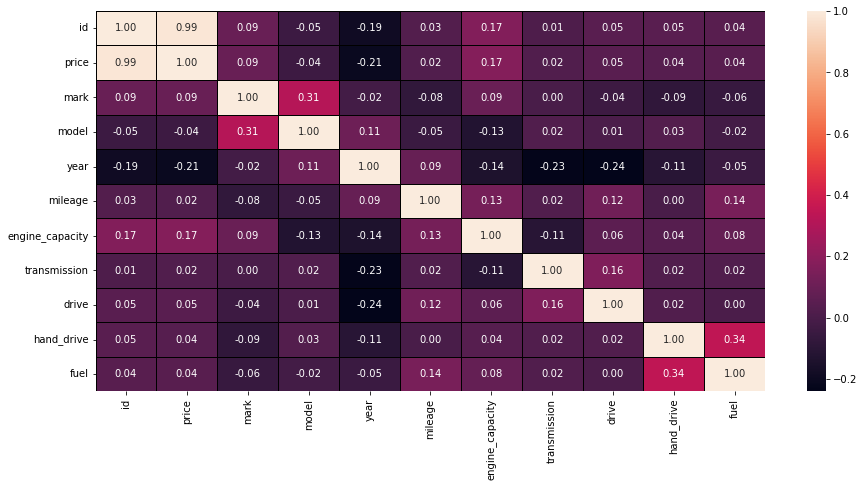

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

# checking Skewness:

In [43]:
data.skew()

id                 -0.002276
price              -0.466780
mark               -0.947938
model              -0.267060
year               -0.845917
mileage             3.089142
engine_capacity     4.038892
transmission        4.394841
drive               3.193137
hand_drive         12.811470
fuel               12.818733
dtype: float64

# *  Noraml Distribution curve:

<AxesSubplot:xlabel='price', ylabel='Density'>

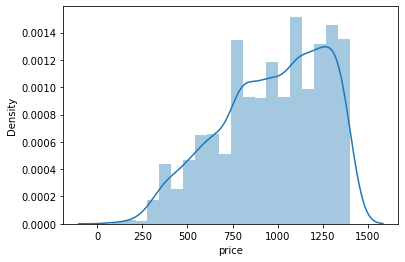

In [44]:
sns.distplot(data['price'])

<AxesSubplot:xlabel='mark', ylabel='Density'>

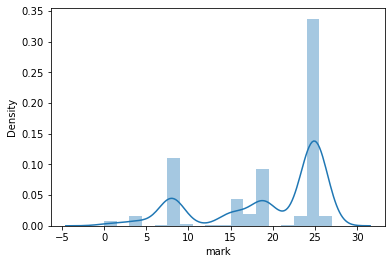

In [45]:
sns.distplot(data['mark'])

<AxesSubplot:xlabel='model', ylabel='Density'>

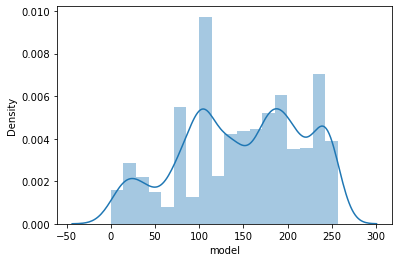

In [46]:
sns.distplot(data['model'])

<AxesSubplot:xlabel='year', ylabel='Density'>

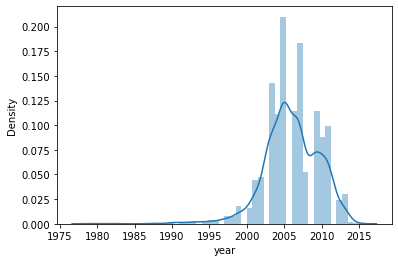

In [47]:
sns.distplot(data['year'])

<AxesSubplot:xlabel='mileage', ylabel='Density'>

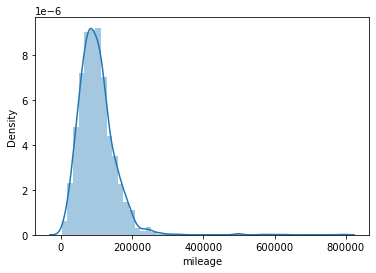

In [48]:
sns.distplot(data['mileage'])

<AxesSubplot:xlabel='engine_capacity', ylabel='Density'>

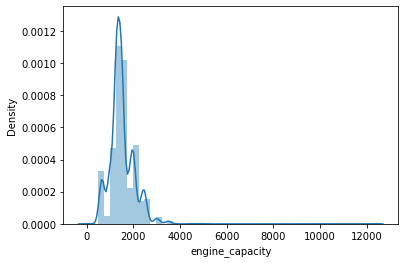

In [49]:
sns.distplot(data['engine_capacity'])

<AxesSubplot:xlabel='transmission', ylabel='Density'>

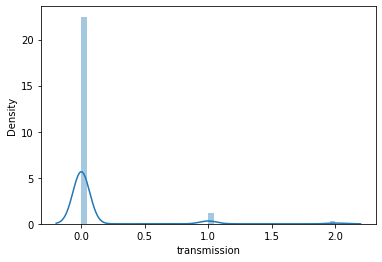

In [50]:
sns.distplot(data['transmission'])

<AxesSubplot:xlabel='drive', ylabel='Density'>

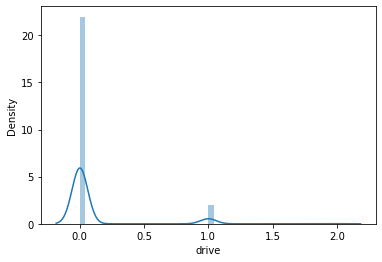

In [51]:
sns.distplot(data['drive'])

<AxesSubplot:xlabel='hand_drive', ylabel='Density'>

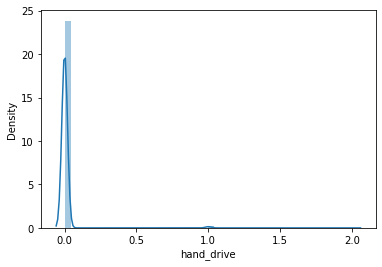

In [52]:
sns.distplot(data['hand_drive'])

<AxesSubplot:xlabel='fuel', ylabel='Density'>

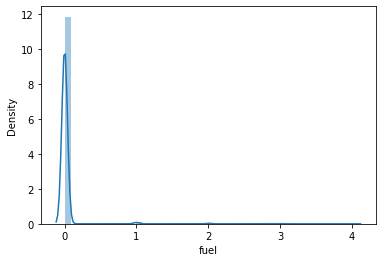

In [53]:
sns.distplot(data['fuel'])

# Outliers checking

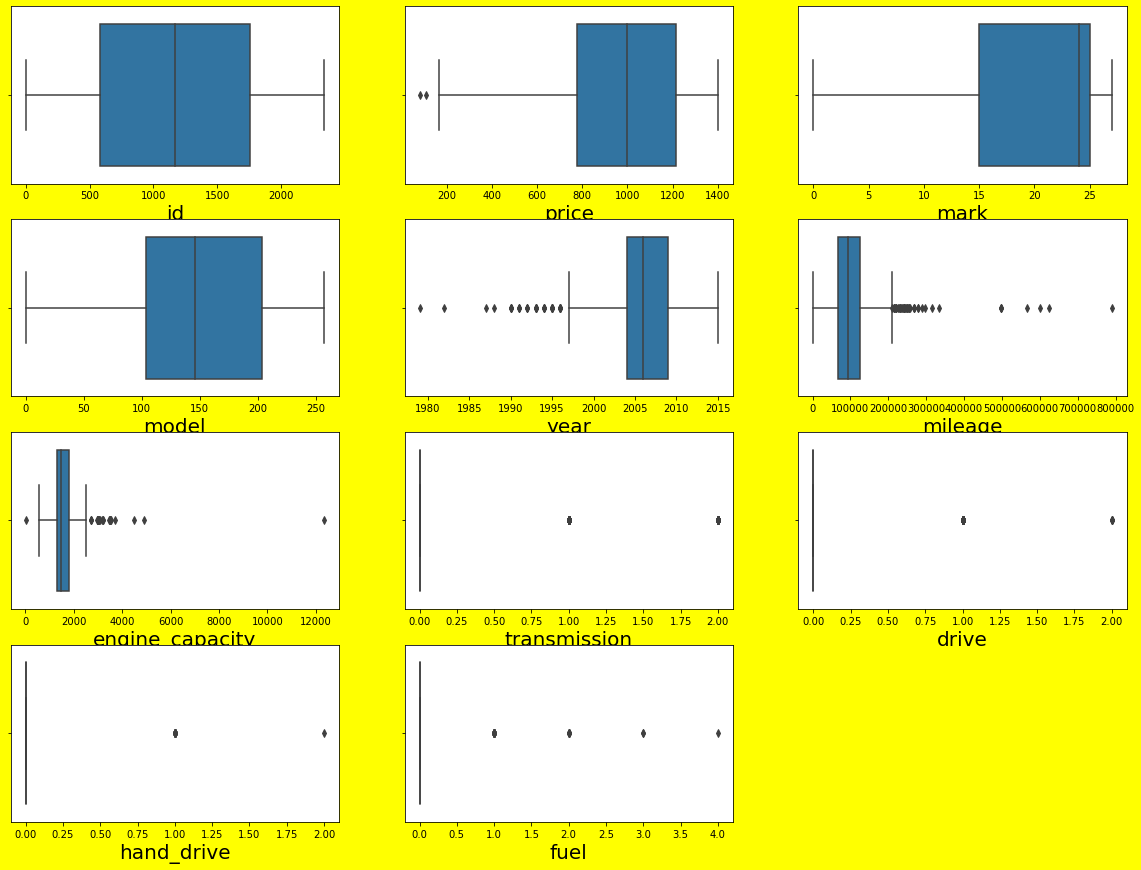

In [54]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# * Removing Outliers:

# z-score techinque:

In [55]:
from scipy.stats import zscore
import numpy as np
z_score = zscore(data[['year','mileage','engine_capacity','price']])
abs_z_score = np.abs(z_score)

In [56]:
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000
mean,1164.478338,969.938992,19.485853,148.759063,2006.137047,97778.549072,1491.956233,0.068081,0.082228,0.006631,0.014589
std,673.726566,287.956003,7.126861,68.492305,3.357875,43247.336503,464.416194,0.300019,0.282706,0.081180,0.168924
min,1.000000,110.000000,0.000000,0.000000,1995.000000,2000.000000,650.000000,0.000000,0.000000,0.000000,0.000000
25%,579.250000,775.000000,15.000000,104.000000,2004.000000,67000.000000,1300.000000,0.000000,0.000000,0.000000,0.000000
50%,1162.500000,1000.000000,24.000000,150.000000,2006.000000,93613.000000,1490.000000,0.000000,0.000000,0.000000,0.000000
75%,1750.750000,1213.000000,25.000000,205.000000,2009.000000,122894.250000,1800.000000,0.000000,0.000000,0.000000,0.000000
max,2335.000000,1400.000000,27.000000,257.000000,2015.000000,255800.000000,3100.000000,2.000000,2.000000,1.000000,4.000000


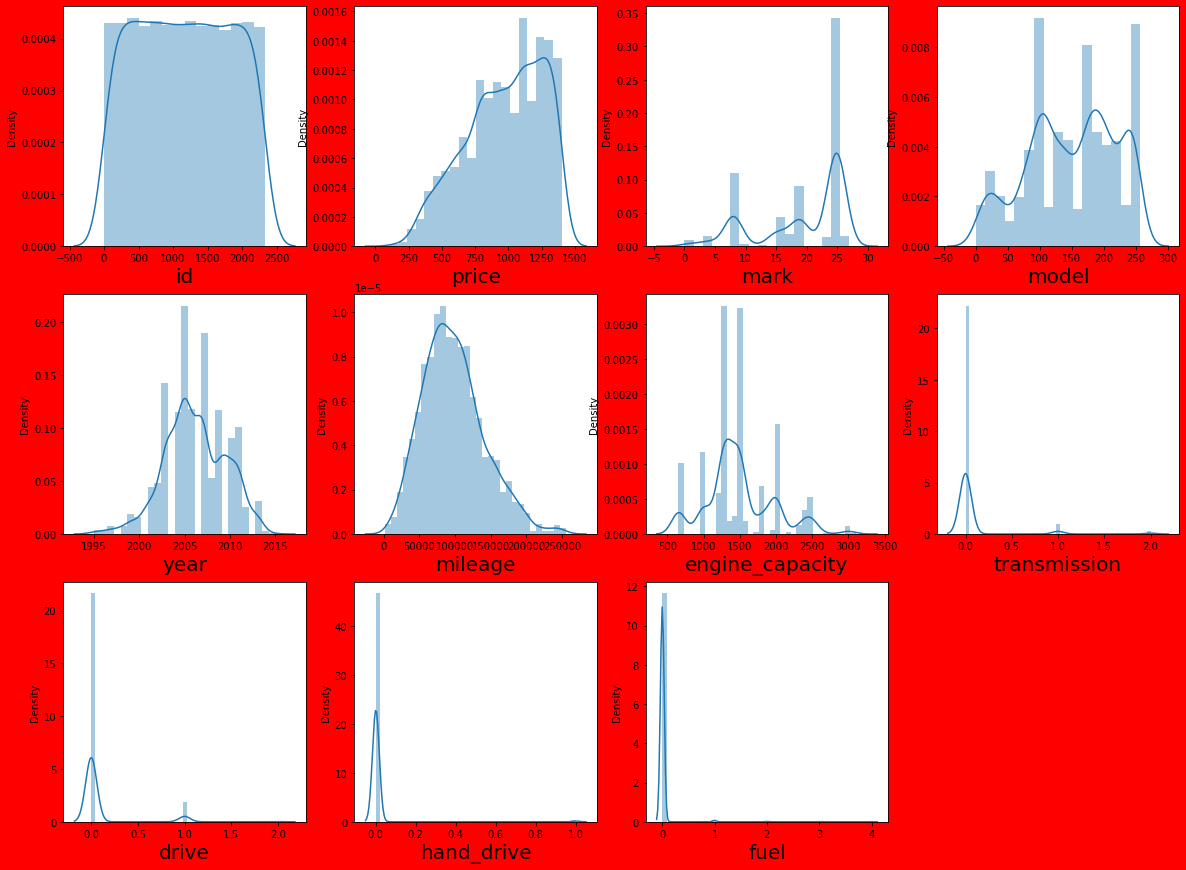

In [57]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Dropping Unwanted columns

In [58]:
data = data.drop(columns=['id'])
data.head()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
1,110,19,143,2010,53000,1200,0,0,0,0
2,165,19,134,2005,47690,2000,0,0,0,0
3,190,25,29,2008,130661,1990,0,0,0,0
4,190,4,155,2006,66300,660,0,0,0,0
5,190,4,155,2004,81400,660,0,0,0,0


# * Finding relationship we want to keep only those feature which relationship with Label

In [59]:
x=data.drop(columns=['price'])
y=data['price']

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

# * check Multicollinearty problem. find if one feature is dependent on another feature

# VIF (variance inflation factor)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
vif = pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]

vif['feature']=x.columns

In [64]:
vif

,vif,feature
0,1.179021,mark
1,1.175017,model
2,1.162580,year
3,1.069595,mileage
4,1.156864,engine_capacity
5,1.058828,transmission
6,1.102620,drive
7,1.162111,hand_drive
8,1.145215,fuel


# All the VIF values are less 5 and are very low that means no multicollinearity now we can go ahead with fitting our data to the model before that let's split in test and training set¶

# * Train Test Split

# split data into train and test modles will be bulit on training data and tested on test data

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=7999)

# * Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [68]:
regression.score(x_train,y_train)

0.08224366568992247

In [69]:
regression.score(x_test,y_test)

0.06160342927564333

# * Lasso Regularization

In [70]:
from sklearn.linear_model import Lasso,LassoCV

In [71]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [72]:
alpha=lasscv.alpha_
alpha

0.03514980002124255

In [73]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.03514980002124255)

In [74]:
lasso_reg.score(x_test,y_test)

0.061676379450211205

In [75]:
lasso_reg.score(x_train,y_train)

0.08224354934773681

# * RandomForestRegressor

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf=RandomForestRegressor()

In [78]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [79]:
rf.score(x_train,y_train)

0.8950686437101796

In [80]:
rf.score(x_test,y_test)

0.21841185874954983

# But we can clearly see that we dont get much accuracy lets do hyperparameter tuning.

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
param={'criterion':['mse','mae'],
          'max_features':['auto','sqrt','log2']}

In [83]:
rf=RandomForestRegressor()
clf=GridSearchCV(rf,param)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [84]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [85]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')

rf.fit(x_train,y_train) 

rf.score(x_train,y_train)

rf_pred=rf.predict(x_test) 



In [86]:
clf.score(x_train,y_train)

0.8743900573491721

In [87]:
clf.score(x_test,y_test)

0.23941809784502865

In [88]:
x_pred=clf.predict(x_train) 
r2_score(y_train,x_pred) *100

87.4390057349172

In [89]:
y_pred=clf.predict(x_test)
r2_score(y_test,y_pred)*100 

23.941809784502865

# Lets Save Our Model¶

In [91]:
import pickle
filename='japancars.'
pickle.dump(clf,open(filename,'wb'))

# Conclusion¶

In [92]:
loaded_model=pickle.load(open('japancars','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

23.941809784502865


In [93]:
# batch  No - ds0522
# Data Trained